In [61]:
from importlib import reload # to reload modules
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import mpl_scatter_density     # density scatter plots
import pandas as pd # Pandas
import uproot
import pickle
import logging

import os # read directories etc.
from scipy.signal import find_peaks, gaussian
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
import pylandau

import time
from timeout_decorator import timeout

import LoadBatch
reload(LoadBatch)
from LoadBatch import *
from SensorClasses import *

In [3]:
pd.set_option('display.max_columns', None)
# logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] - %(message)s')
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] - \t %(message)s')
# plt.rcParams['text.usetex'] = True   ### LateX in matplotlib
# !ls ../Data_TestBeam/2023_May/

In [4]:
# plt.style.use(hep.atlas.style.ATLAS)

### Bins options, sensors and runs import

In [5]:
PIXEL_SIZE = 0.0185 #mm

### choose the bins so that they match the MIMOSA pixels (which are just the coordinates)
large_bins = (np.arange(0, 900,1),
              np.arange(0, 600,1))

bins1 = (np.arange(450, 700, 1),
        np.arange(100, 500, 1))

bins2 = (np.arange(350, 700, 1),
              np.arange(150, 500, 1))

bins3 = (np.arange(300, 800, 1),
              np.arange(0, 450, 1))

bins4 = (np.arange(500, 800, 1),
              np.arange(100, 500, 1))

# small_bins = (np.arange(500, 650, 1),
#               np.arange(200, 450, 1))

### Load the dictionary of sensor names and runs
# dict_of_runs = read_pickle("dict_of_runs.pickle")
dict_of_batches = read_pickle("dict_of_batches.pickle")


# ### presentation path
pres_path = '/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Presentations/2024-02-15 for fast-silicon-pixel'

In [6]:
my_list = list(dict_of_batches.keys())
my_list.sort()
print(my_list)

[100, 101, 199, 201, 202, 203, 204, 205, 206, 301, 401, 402, 403, 407, 408, 409, 410, 411, 413, 414, 501, 502, 503, 504, 505, 601, 602, 603, 604, 605, 701, 702, 801, 802, 901, 902, 1001, 1002, 1101, 1102, 1201, 1202]


I kinda want a 'reversed' dictionary:
for each sensor_name: have a list of batches

## Plot a single batch

In [8]:
### show all information about the batch
this_batch = 701
dir_path = f'/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/{this_batch}'

display(dict_of_batches[this_batch].__dict__)

info_dict = {}
### show all informations about each sensor
for S in ['S1','S2']:
    for ch, sensor in dict_of_batches[this_batch].S[S].channels.items():
#         print(f"{S}, {ch}:", sensor.__dict__)
        info_dict[(S,ch)] = sensor.__dict__
info_df = pd.DataFrame(info_dict)
# Export DataFrame to a CSV file
info_df.to_csv(os.path.join(dir_path,f'table_data_{this_batch}.csv'), index=True)

display(info_df)

{'batch_number': 701,
 'angle': 14.0,
 'runs': [9981, 9984, 9985, 9986, 9987, 9988, 9989, 9990],
 'tempA': -31.025000000000002,
 'tempB': -31.625,
 'S': {'S1': <SensorClasses.Oscilloscope at 0x7f1a8bf56170>,
  'S2': <SensorClasses.Oscilloscope at 0x7f1a8bf56410>}}

S1                                            \
                     Ch1                  Ch2                  Ch3   
name                 MCP  CERN2-CH0-IMEv3-W12  CERN2-CH1-IMEv3-W12   
board           no_board                CERN2                CERN2   
dut_position         4.0                  2.0                  2.0   
fluence                0             1.50E+15             1.50E+15   
transimpedance        -1                10700                10700   
voltage             2800                 -490                 -490   

                                           S2                         \
                                Ch4       Ch1                    Ch2   
name            CERN2-CH2-IMEv3-W12       MCP  JSI-B7-IMEv3-W16-8E14   
board                         CERN2  no_board               no_board   
dut_position                      2       4.0                      1   
fluence                    1.50E+15         0                      0   
transimpedance                10700        -1                     -1   
voltage                        -490      2800                      0   

                                                           
                                 Ch3                  Ch4  
name            JSI-B6-IMEv2-W7-1E14  CERN2-CH4-IMEv3-W16  
board                       no_board                CERN2  
dut_position                       3                  2.0  
fluence                            0             1.50E+15  
transimpedance                    -1                10700  
voltage                            0                 -490

In [9]:
print('S1:', get_DUTs_from_dictionary(info_dict,'S1'))
print('S2:', get_DUTs_from_dictionary(info_dict,'S2'))


S1: [1, 2, 3]
S2: [3]


[INFO] - 	 Loading batch 701 	 Oscilloscope S1


Batch:  701
S1
MCP: 2800 V, angle: 14.0° temperature:-31.03°C


[INFO] - 	 in 'time_mask()': Fit parameters [ 1.80340513e+04 -5.85127637e+03  3.71081085e+01  1.34779493e+01]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.07387728e+04 -5.95692620e+03  3.78426957e+01  8.35592101e+00]
[INFO] - 	 in 'time_mask()': Fit parameters [ 1.34163225e+04 -5.96724893e+03  3.36587915e+01  9.56271012e+00]
/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/testbeam-analysis/LoadBatch.py:971: RuntimeWarning: invalid value encountered in sqrt
  time_resolution_table.append(np.sqrt(param[2]**2-MCP_resolution**2))
/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/testbeam-analysis/LoadBatch.py:971: RuntimeWarning: invalid value encountered in sqrt
  time_resolution_table.append(np.sqrt(param[2]**2-MCP_resolution**2))
/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/testbeam-analysis/LoadBatch.py:971: RuntimeWarning: invalid value encountered in sqrt
  time_resolution_table.append(np.sqrt(param[2]**2-MCP_resolution**2))
/home/marcello/Desktop/Radbo

S2
MCP: 2800 V, angle: 14.0° temperature:-31.03°C


[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 in 'time_mask()': Fit parameters [ 2026.56698307 -5621.61492581   160.63387555    15.39857308]
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying
[INFO] - 	 Two peaks not found, retrying


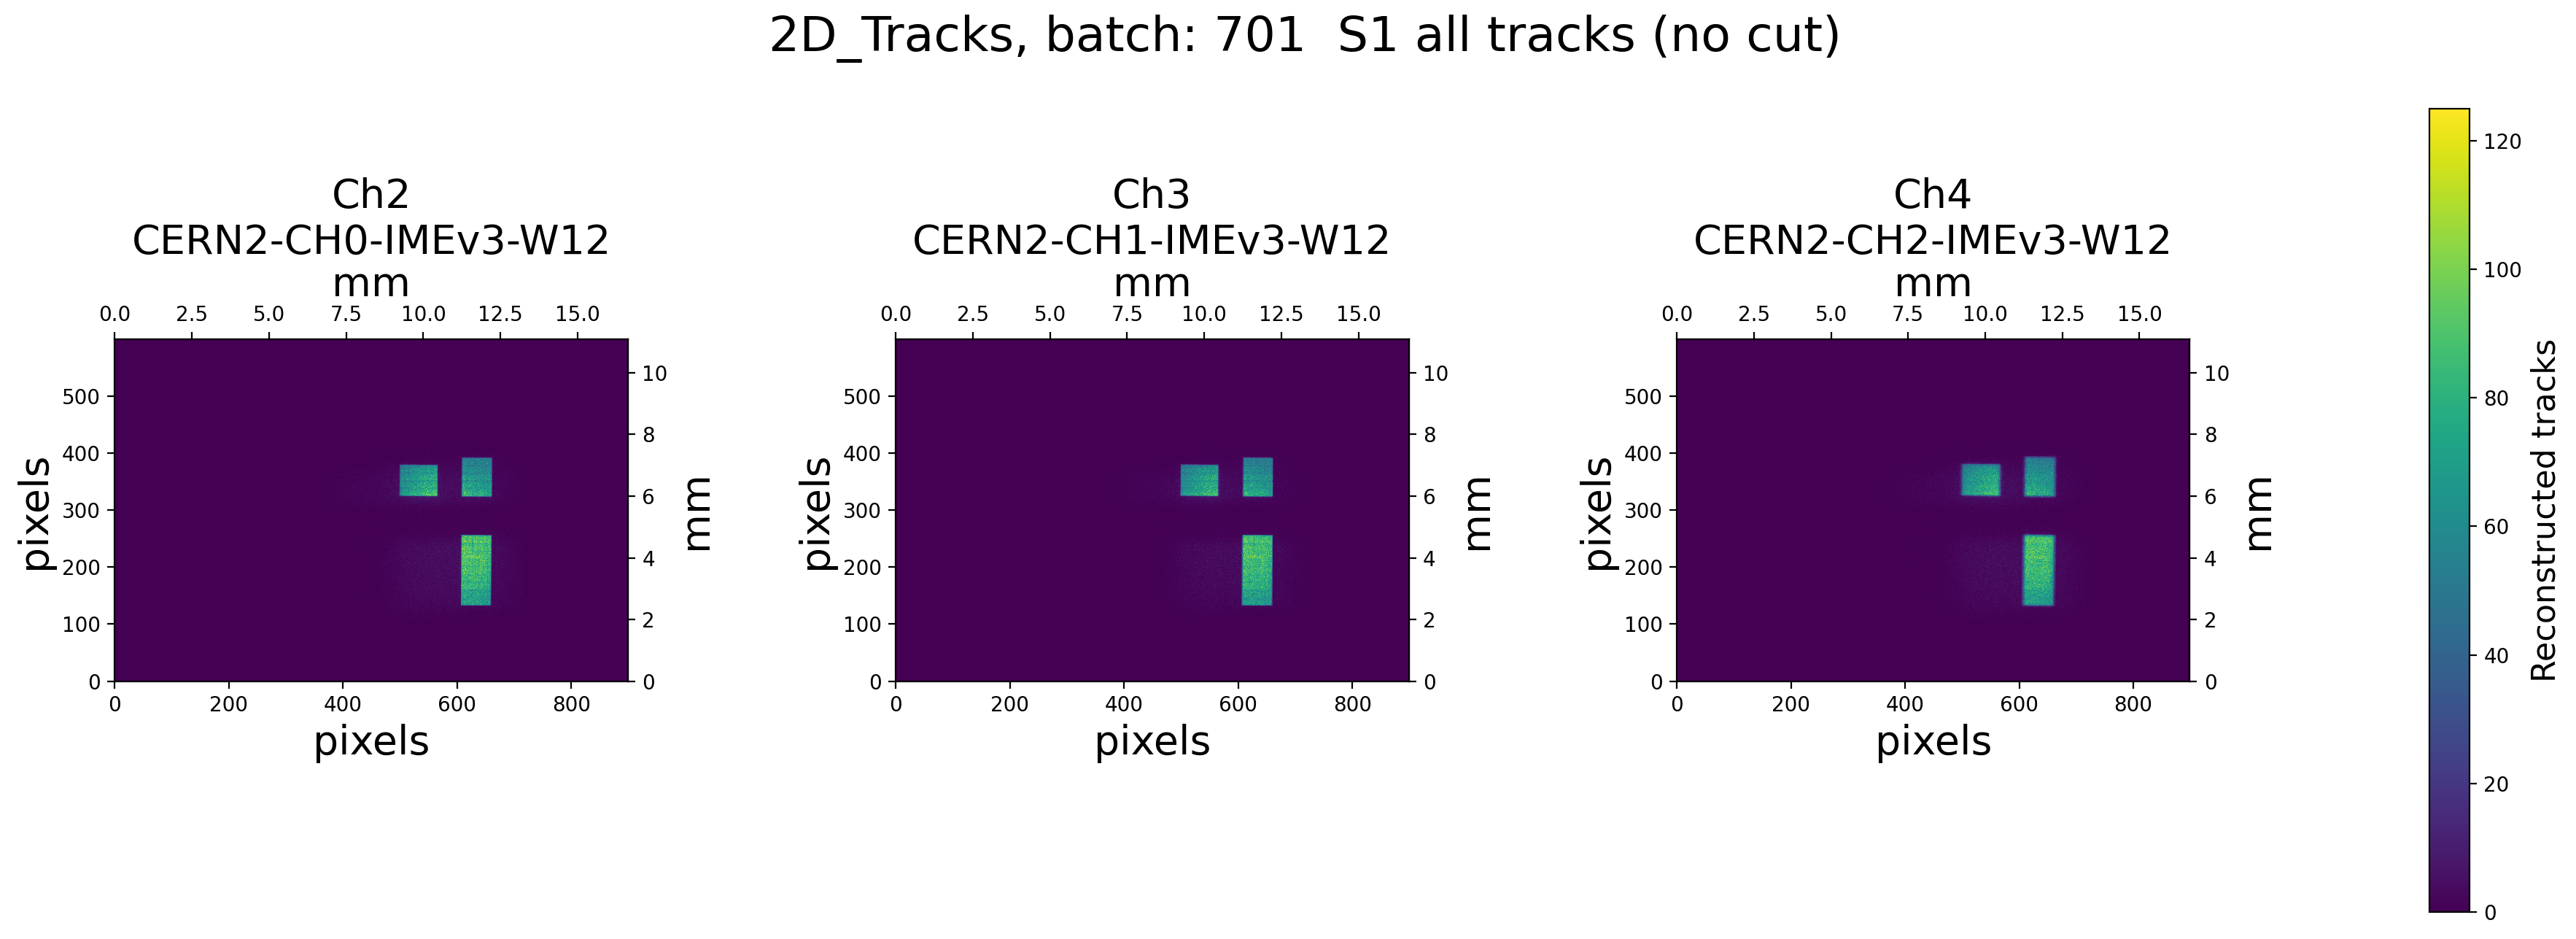

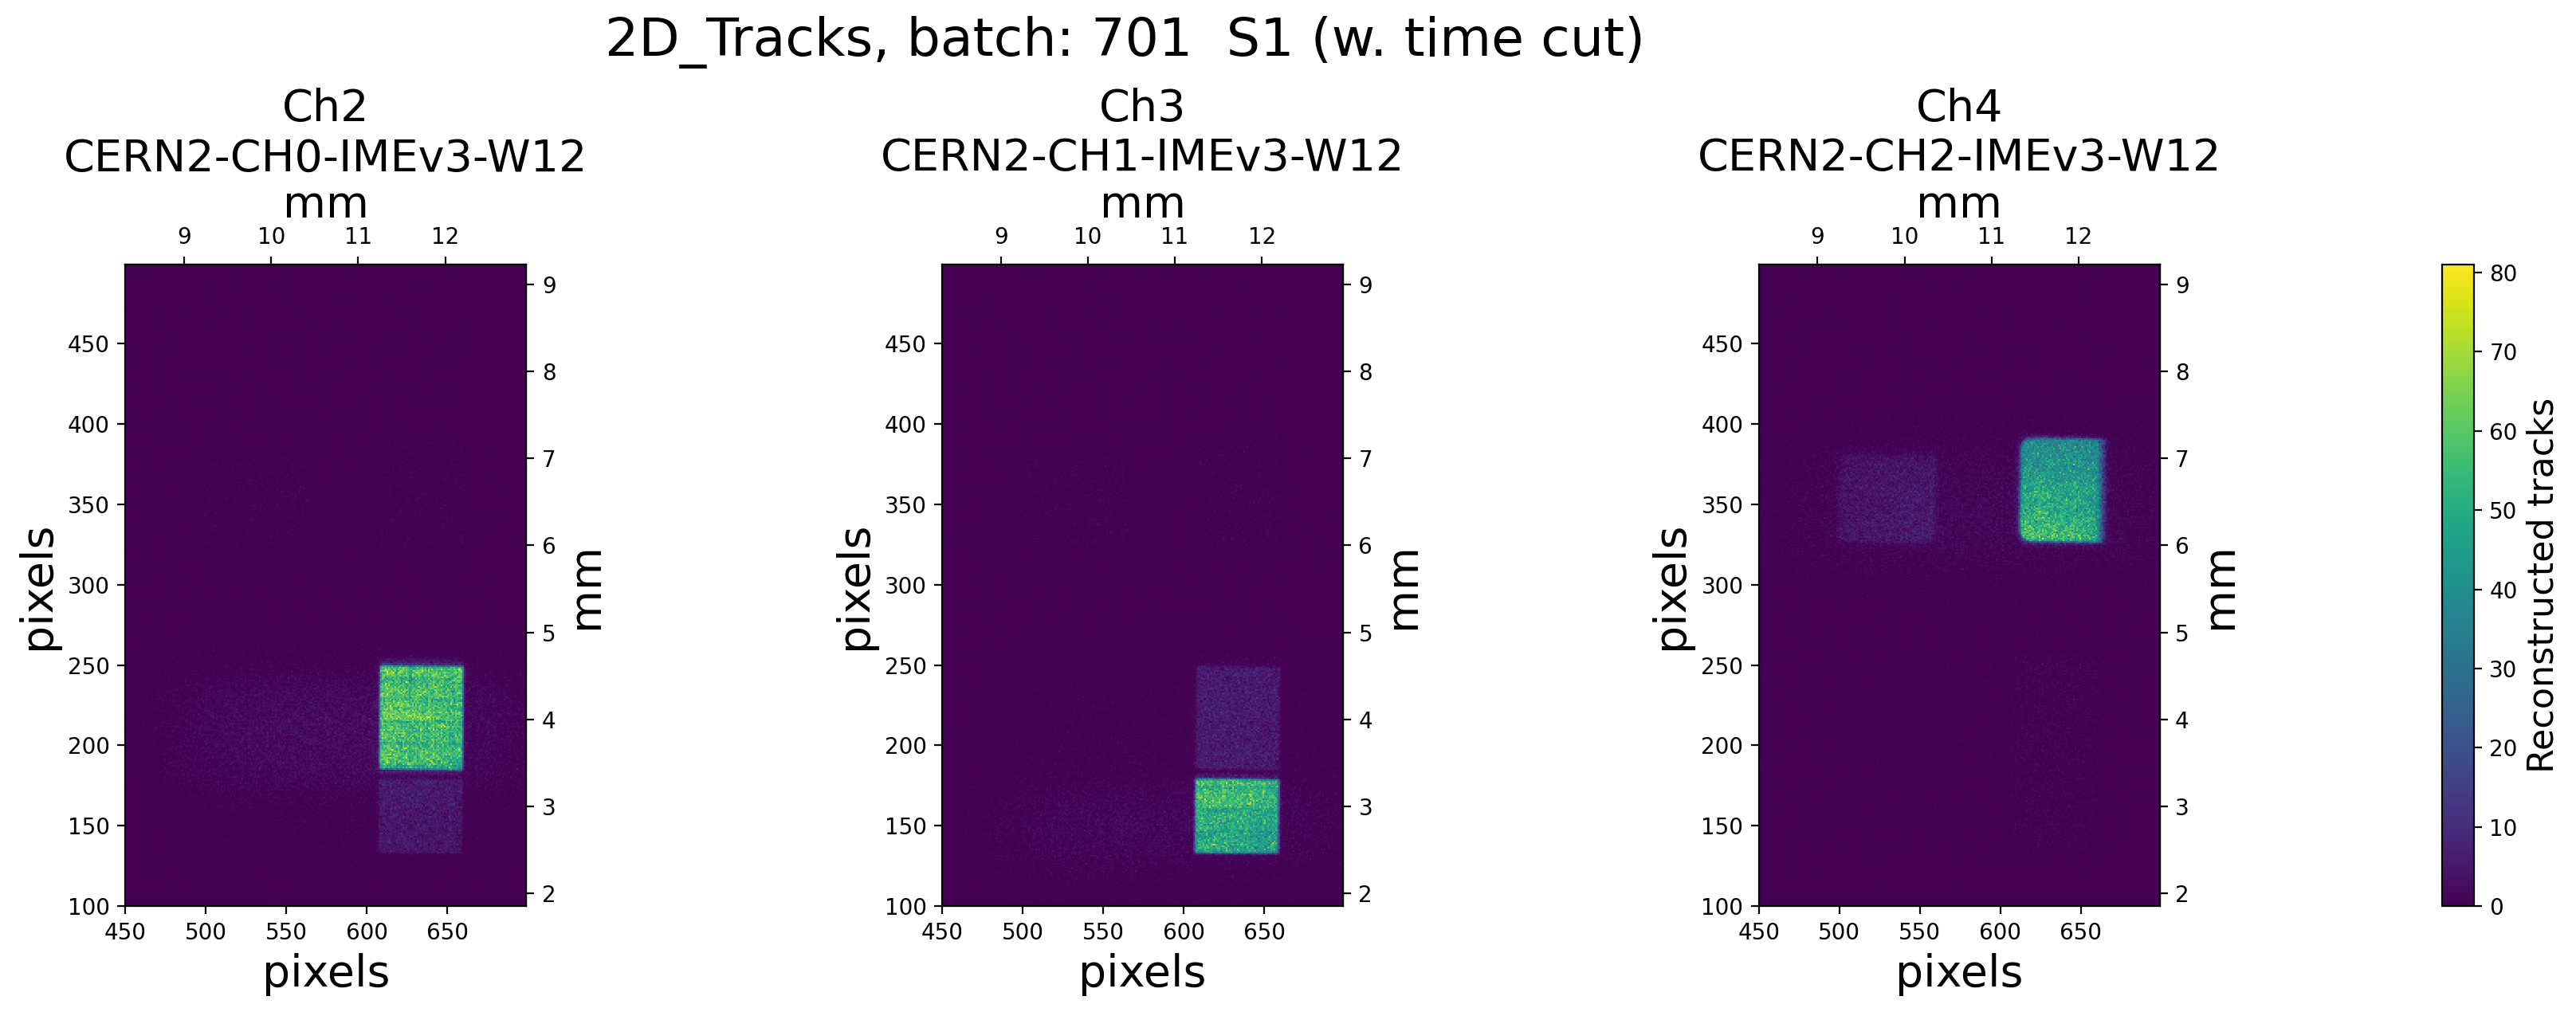

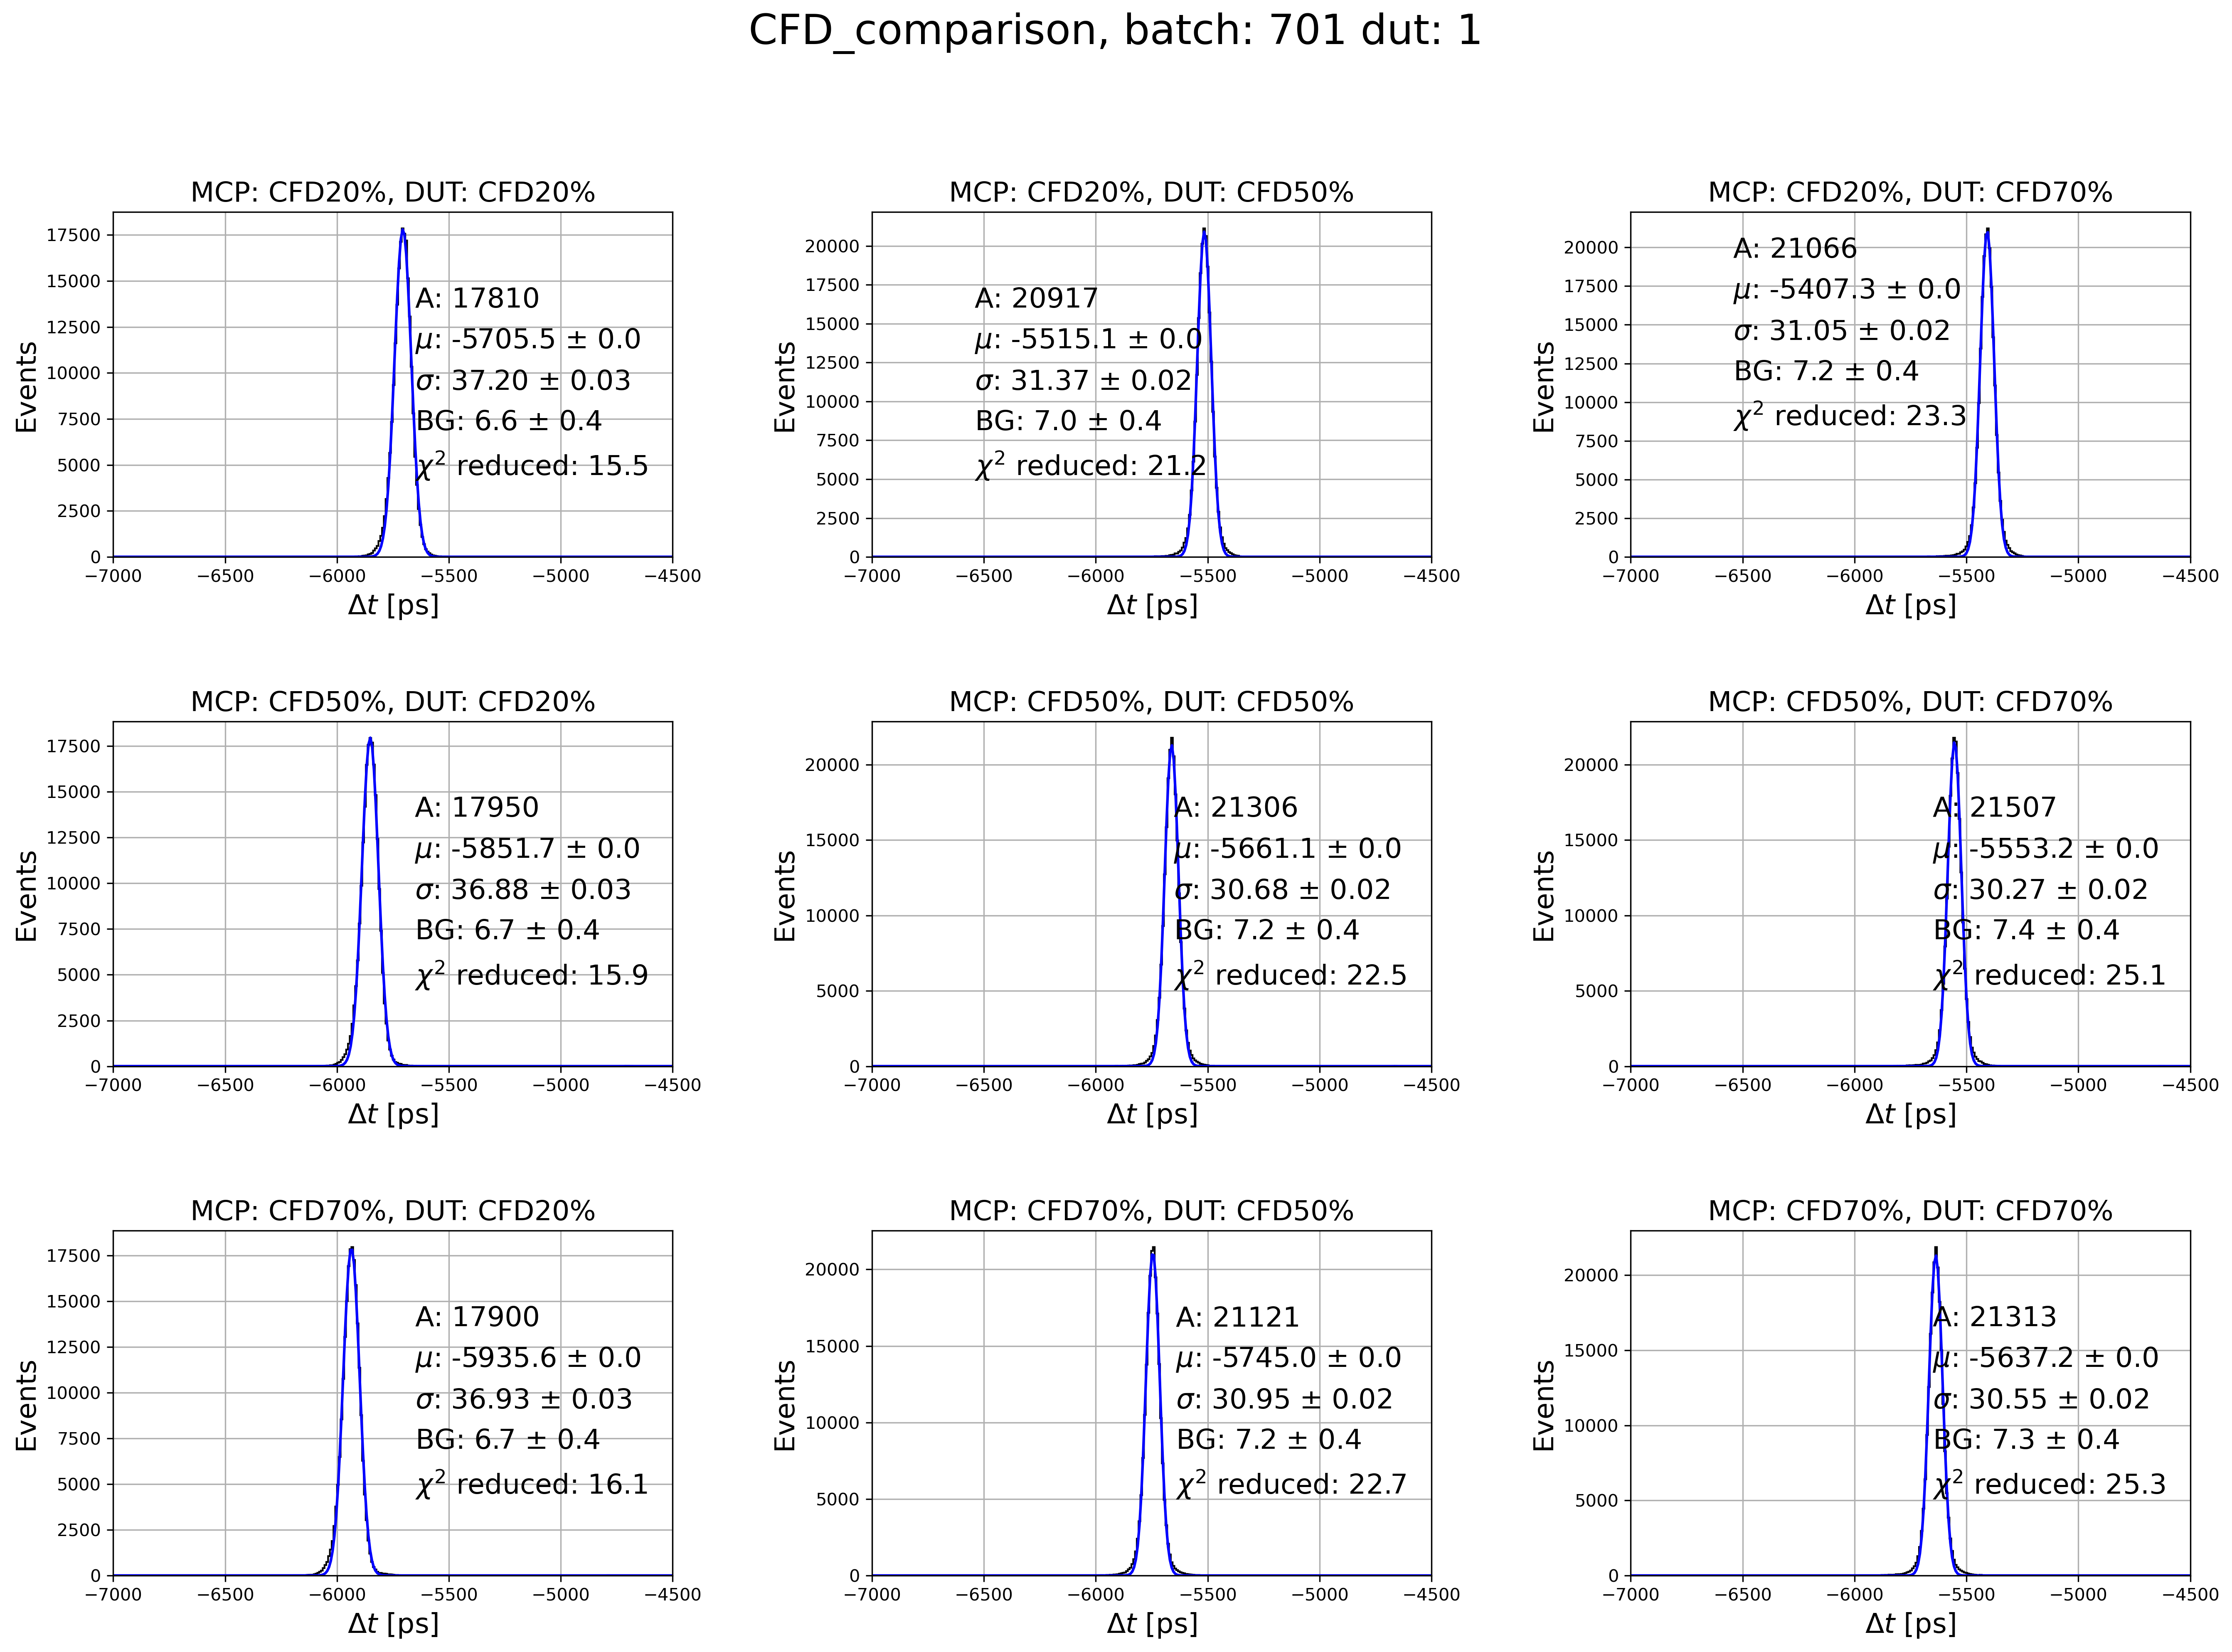

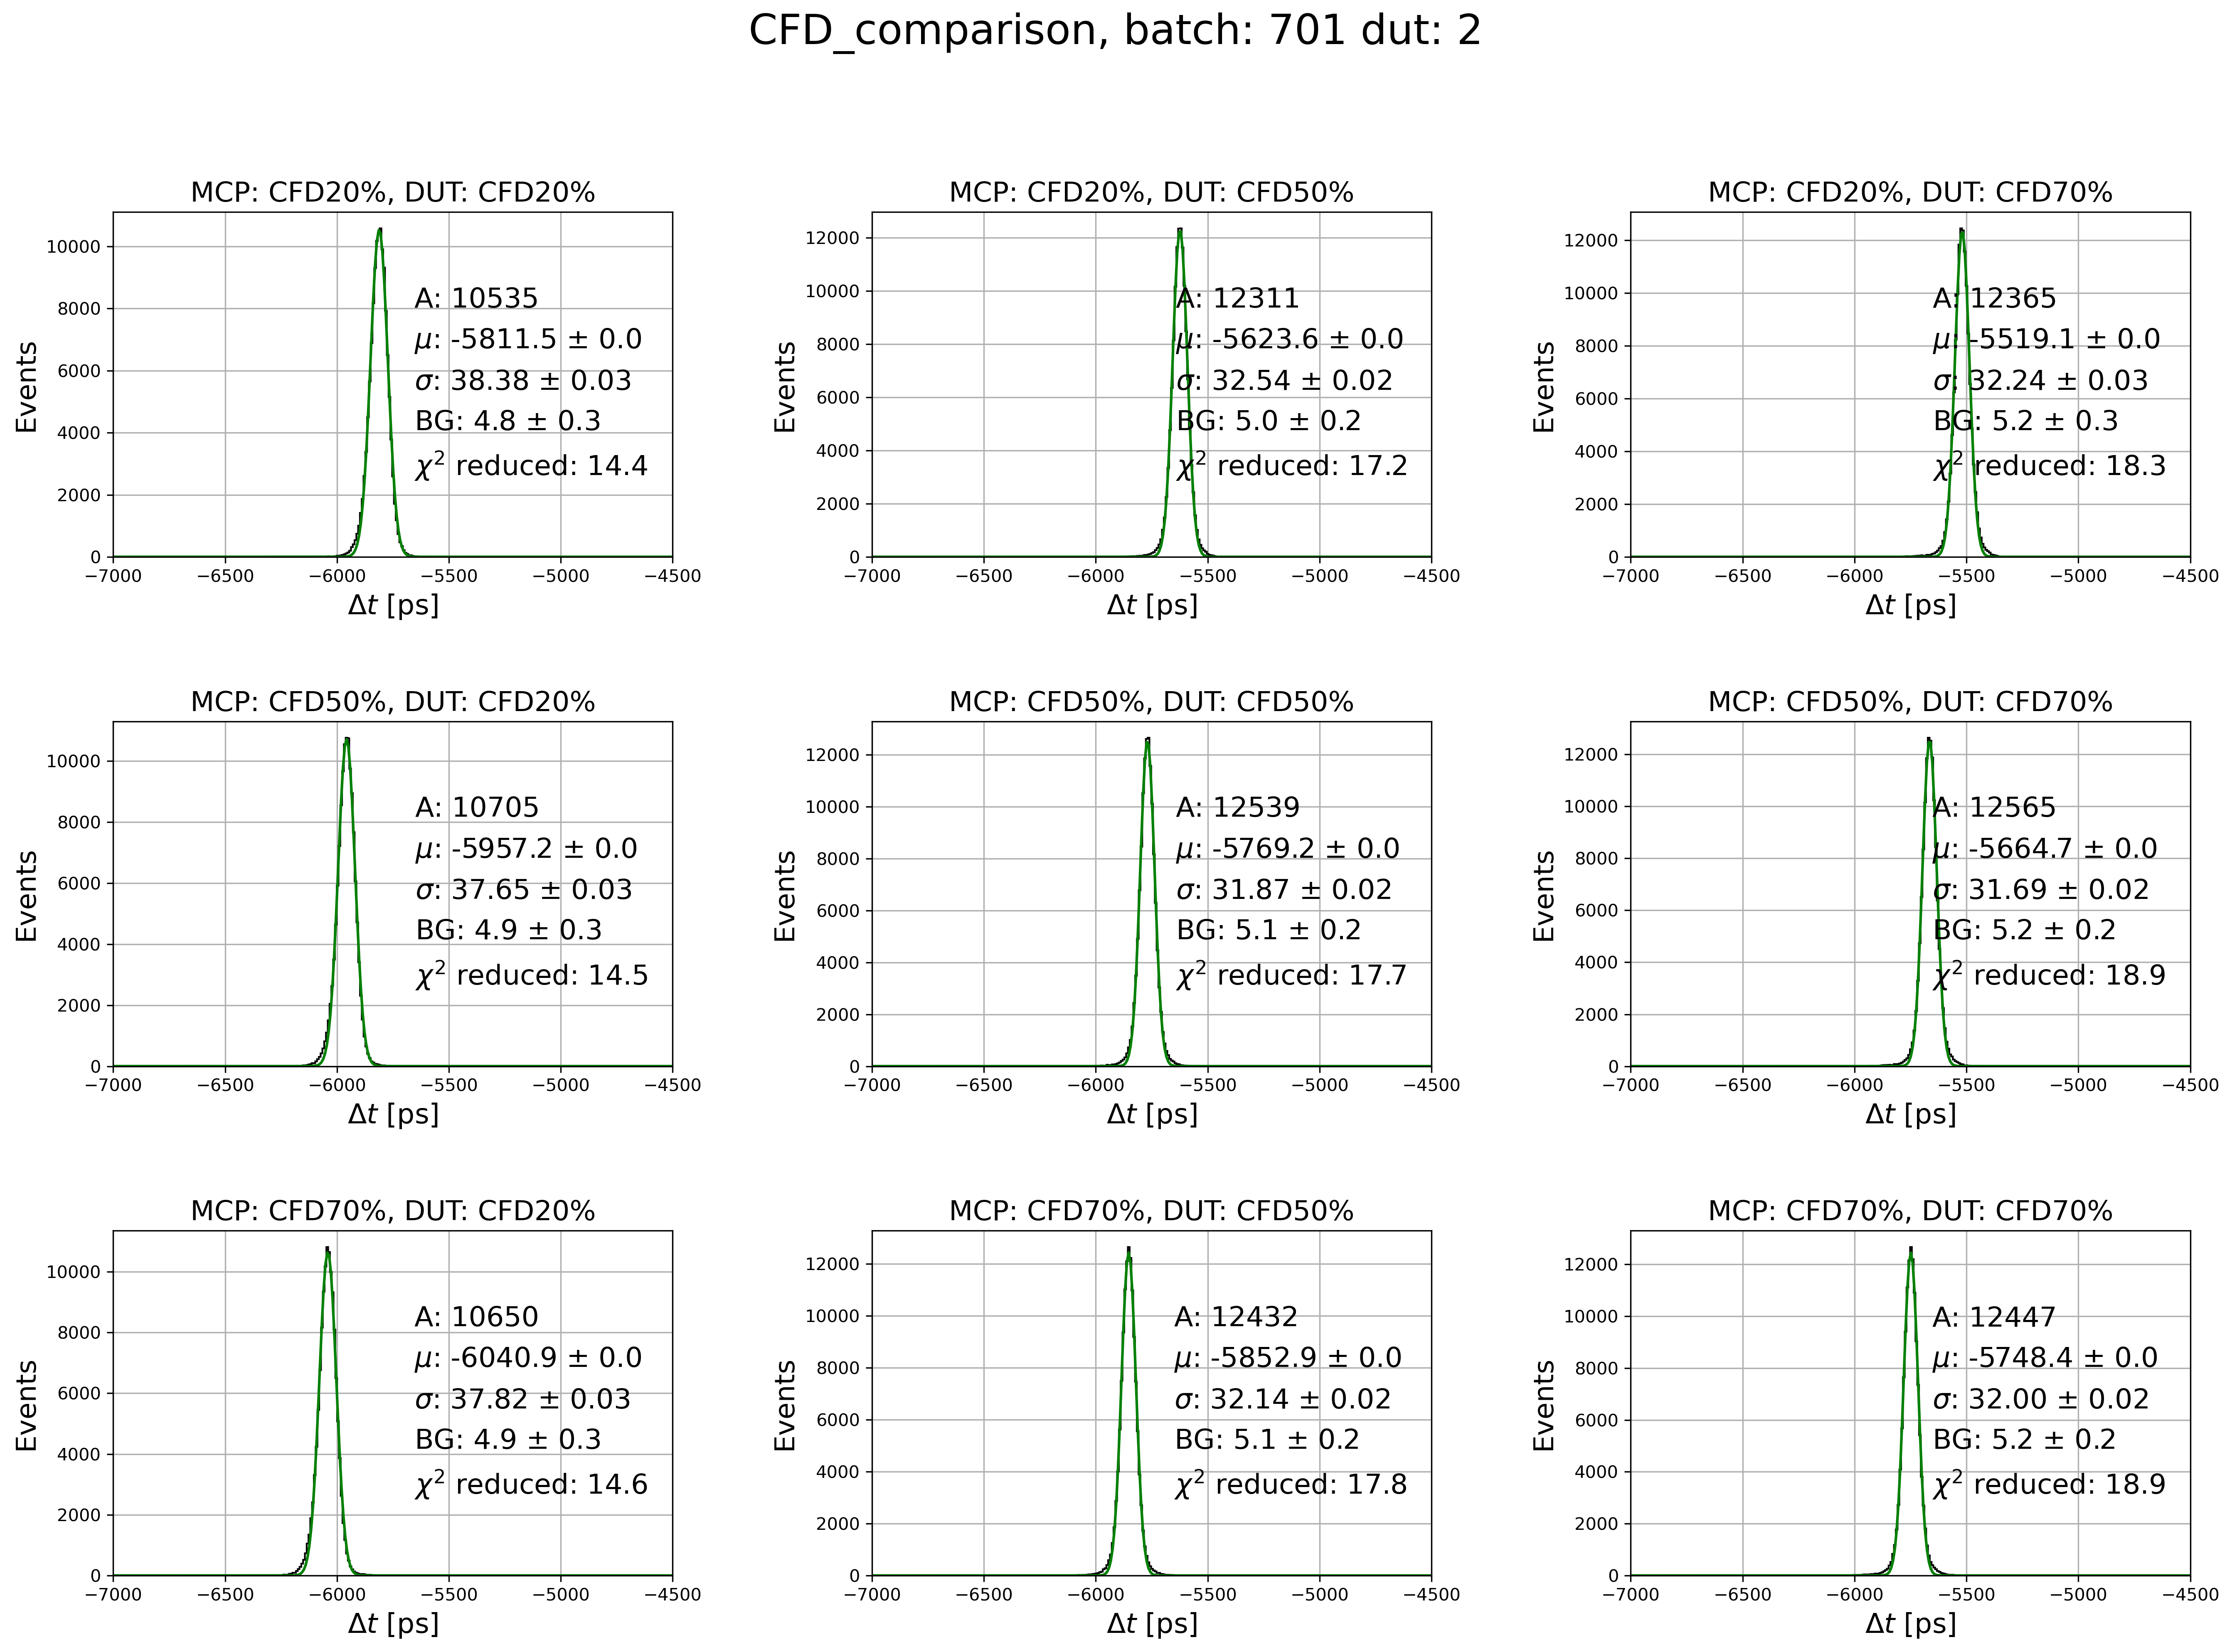

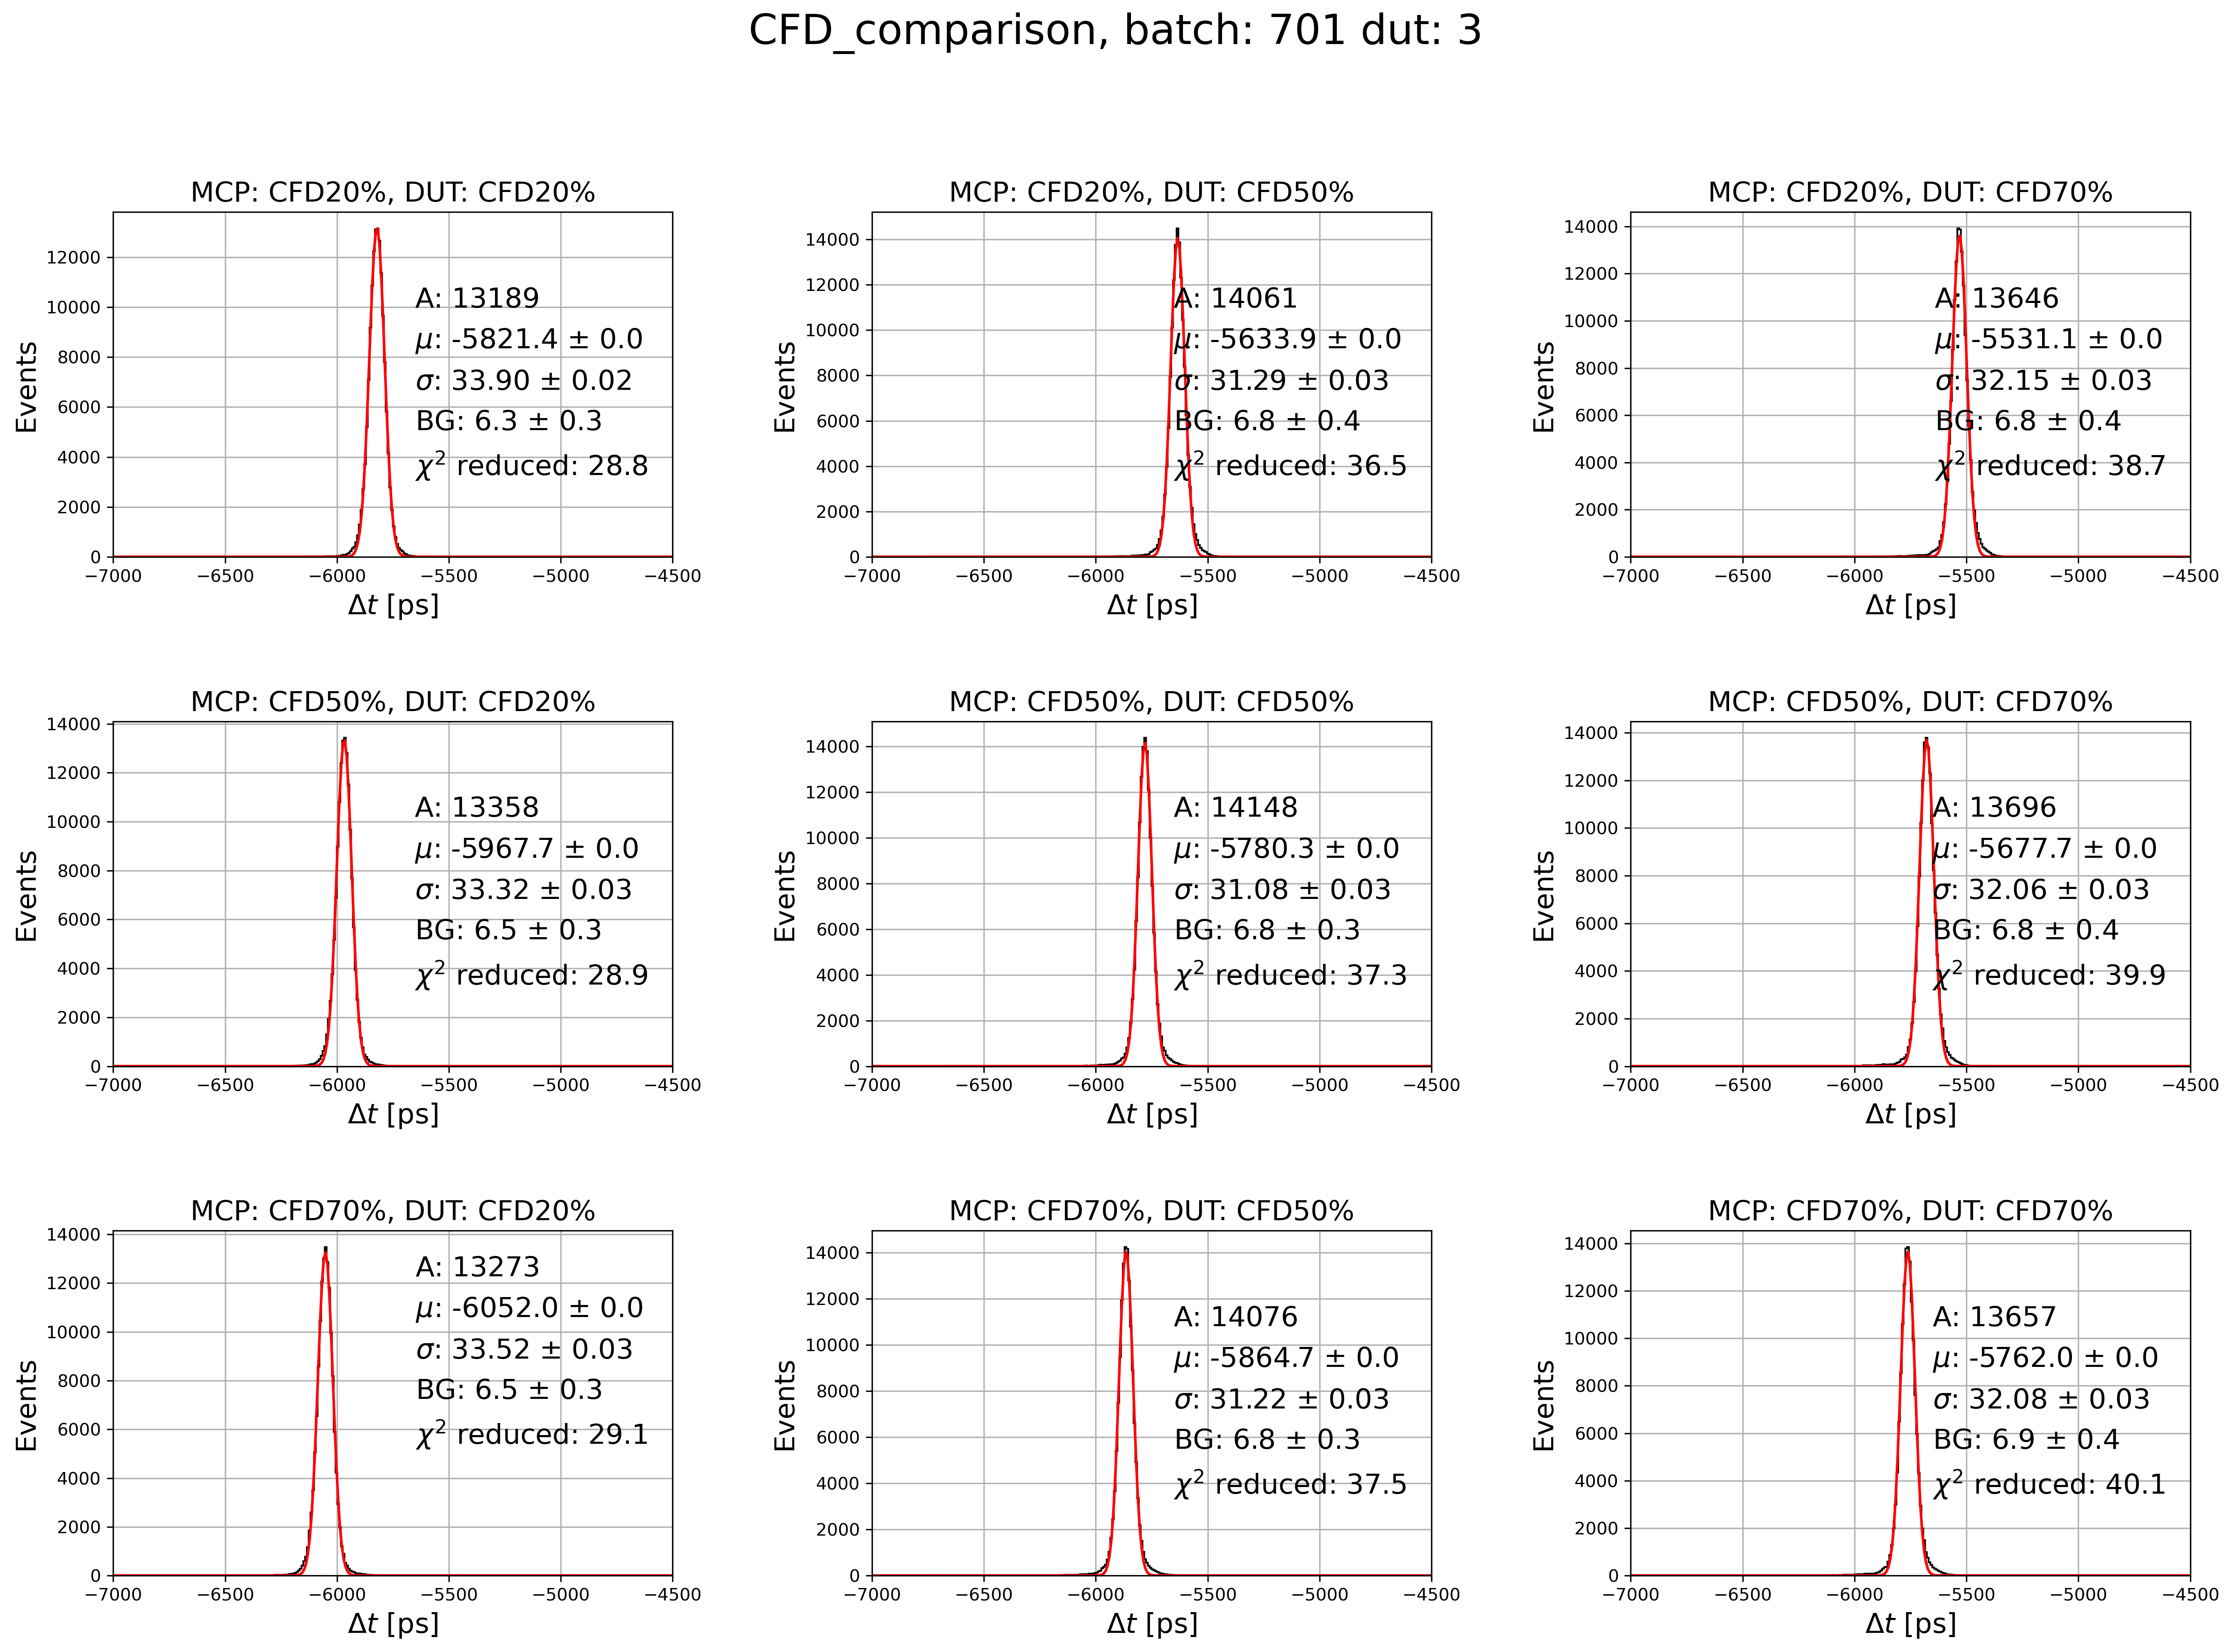

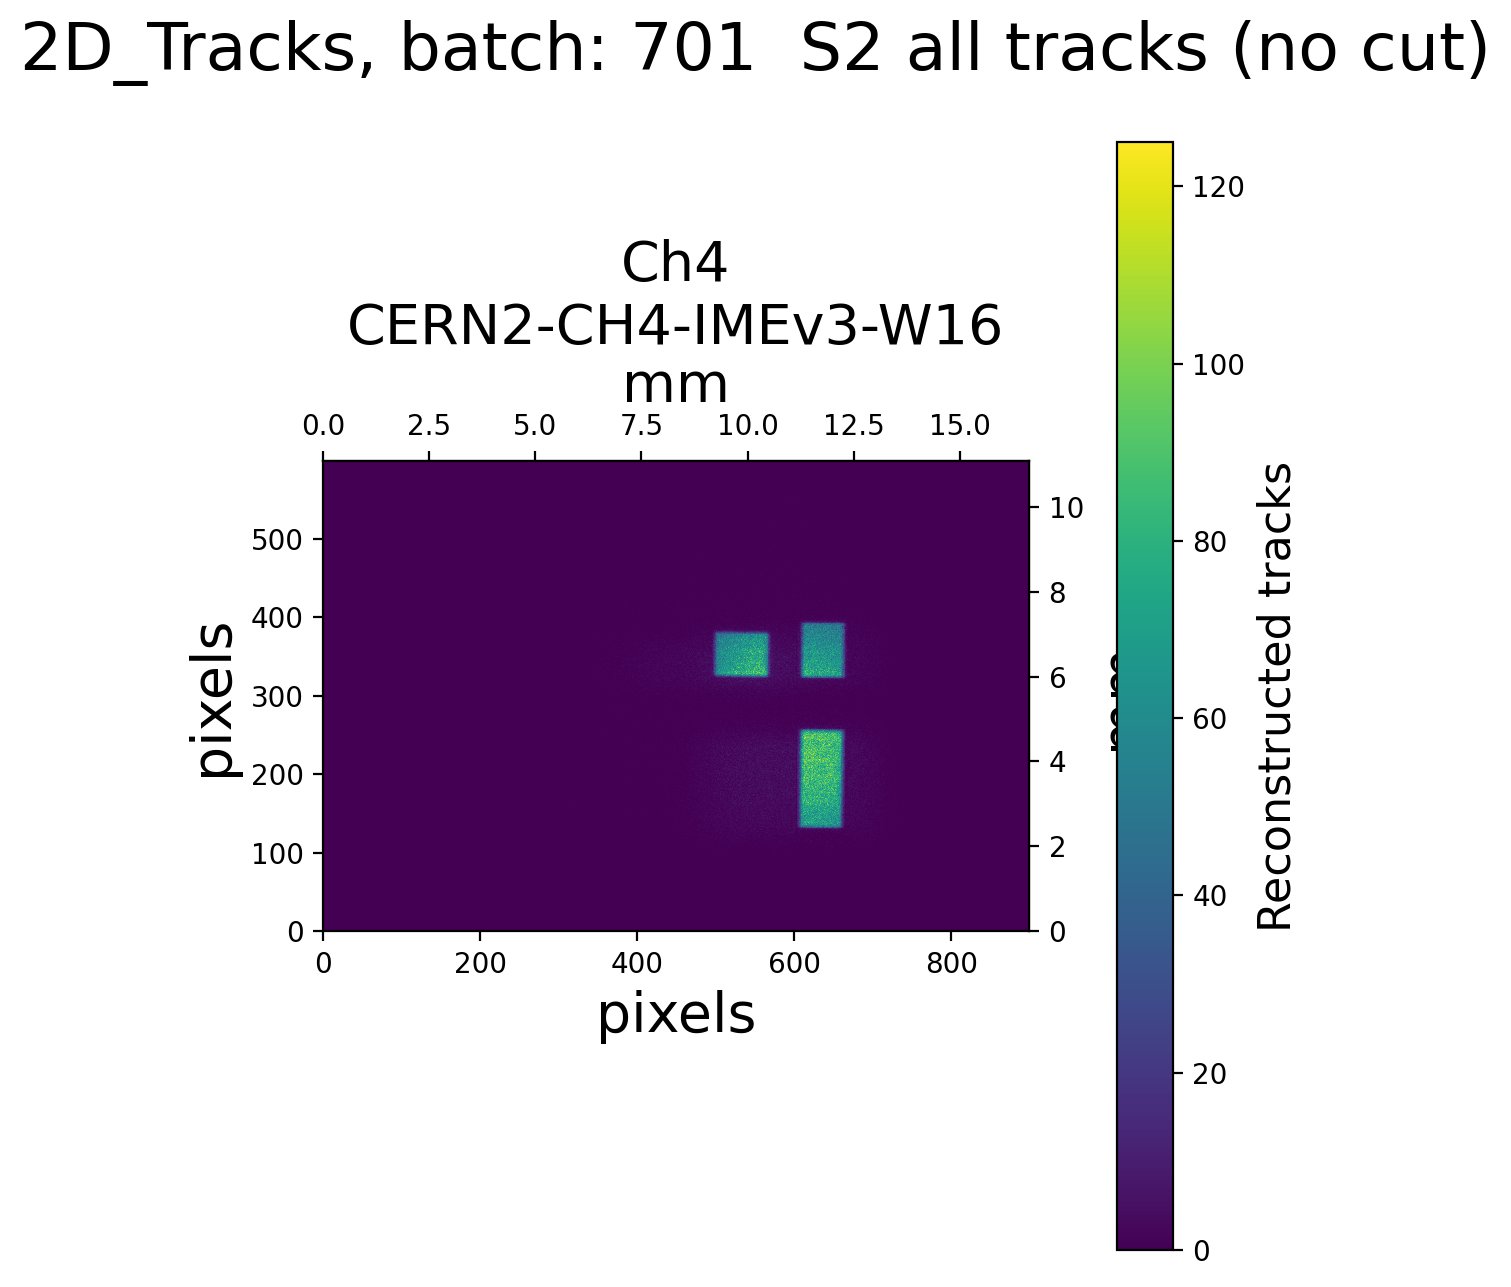

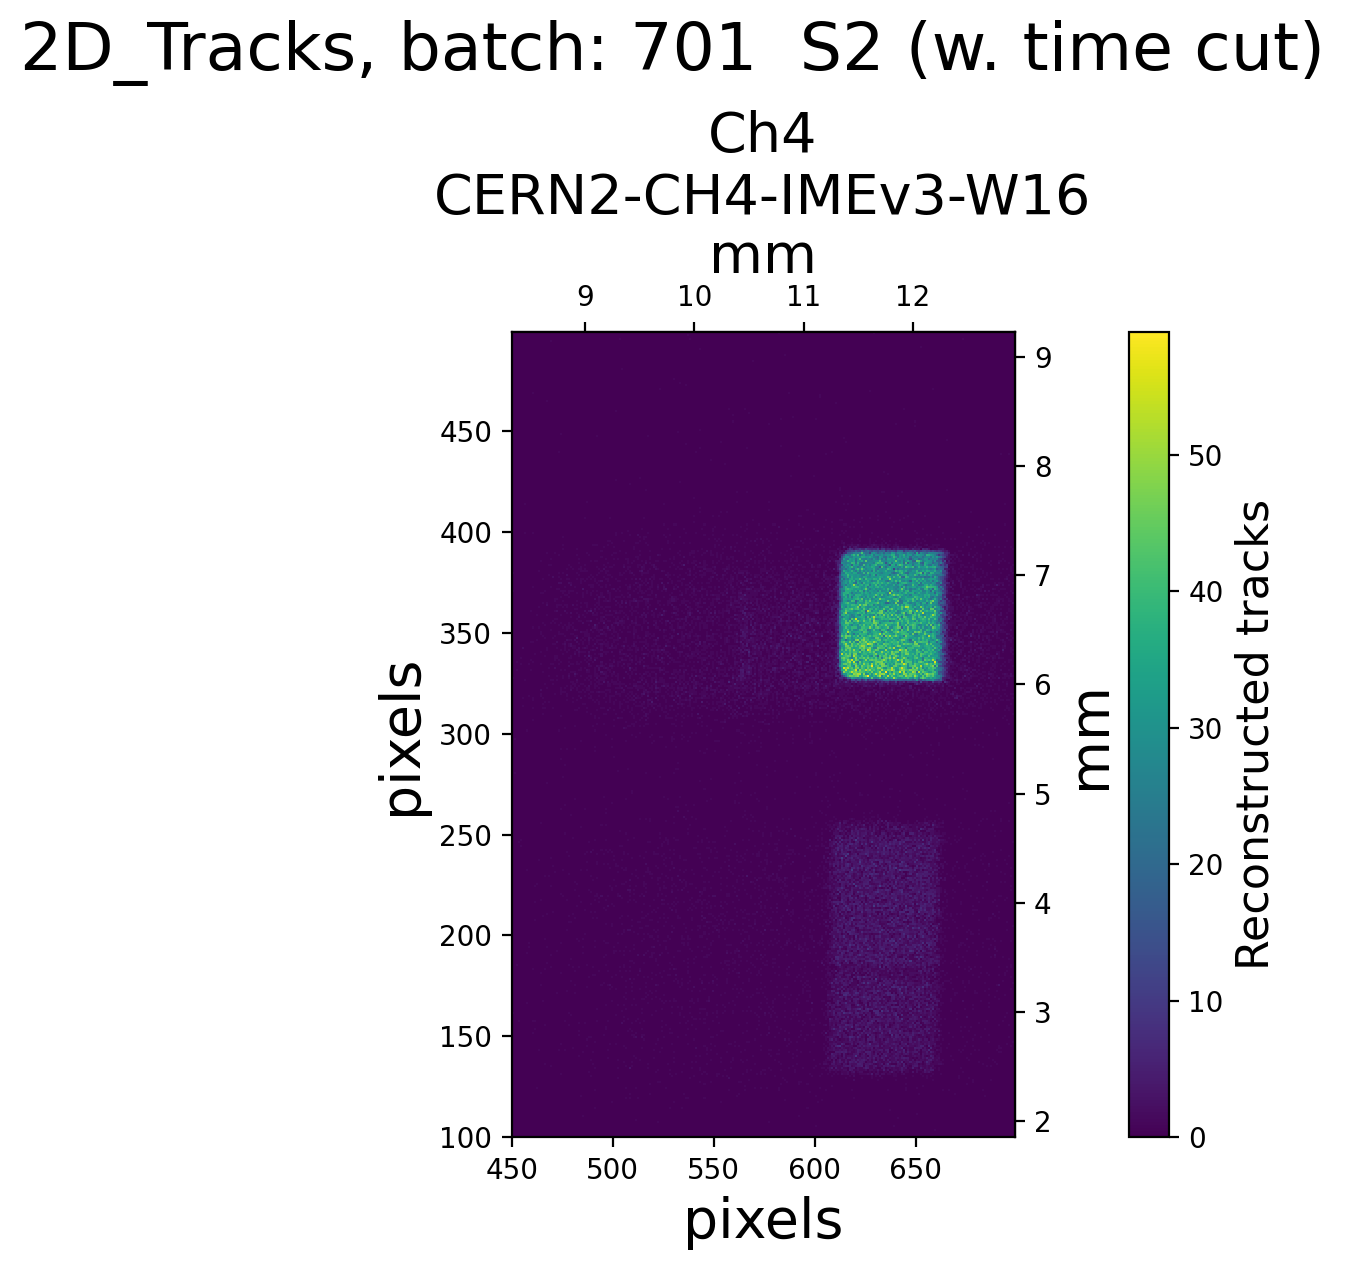

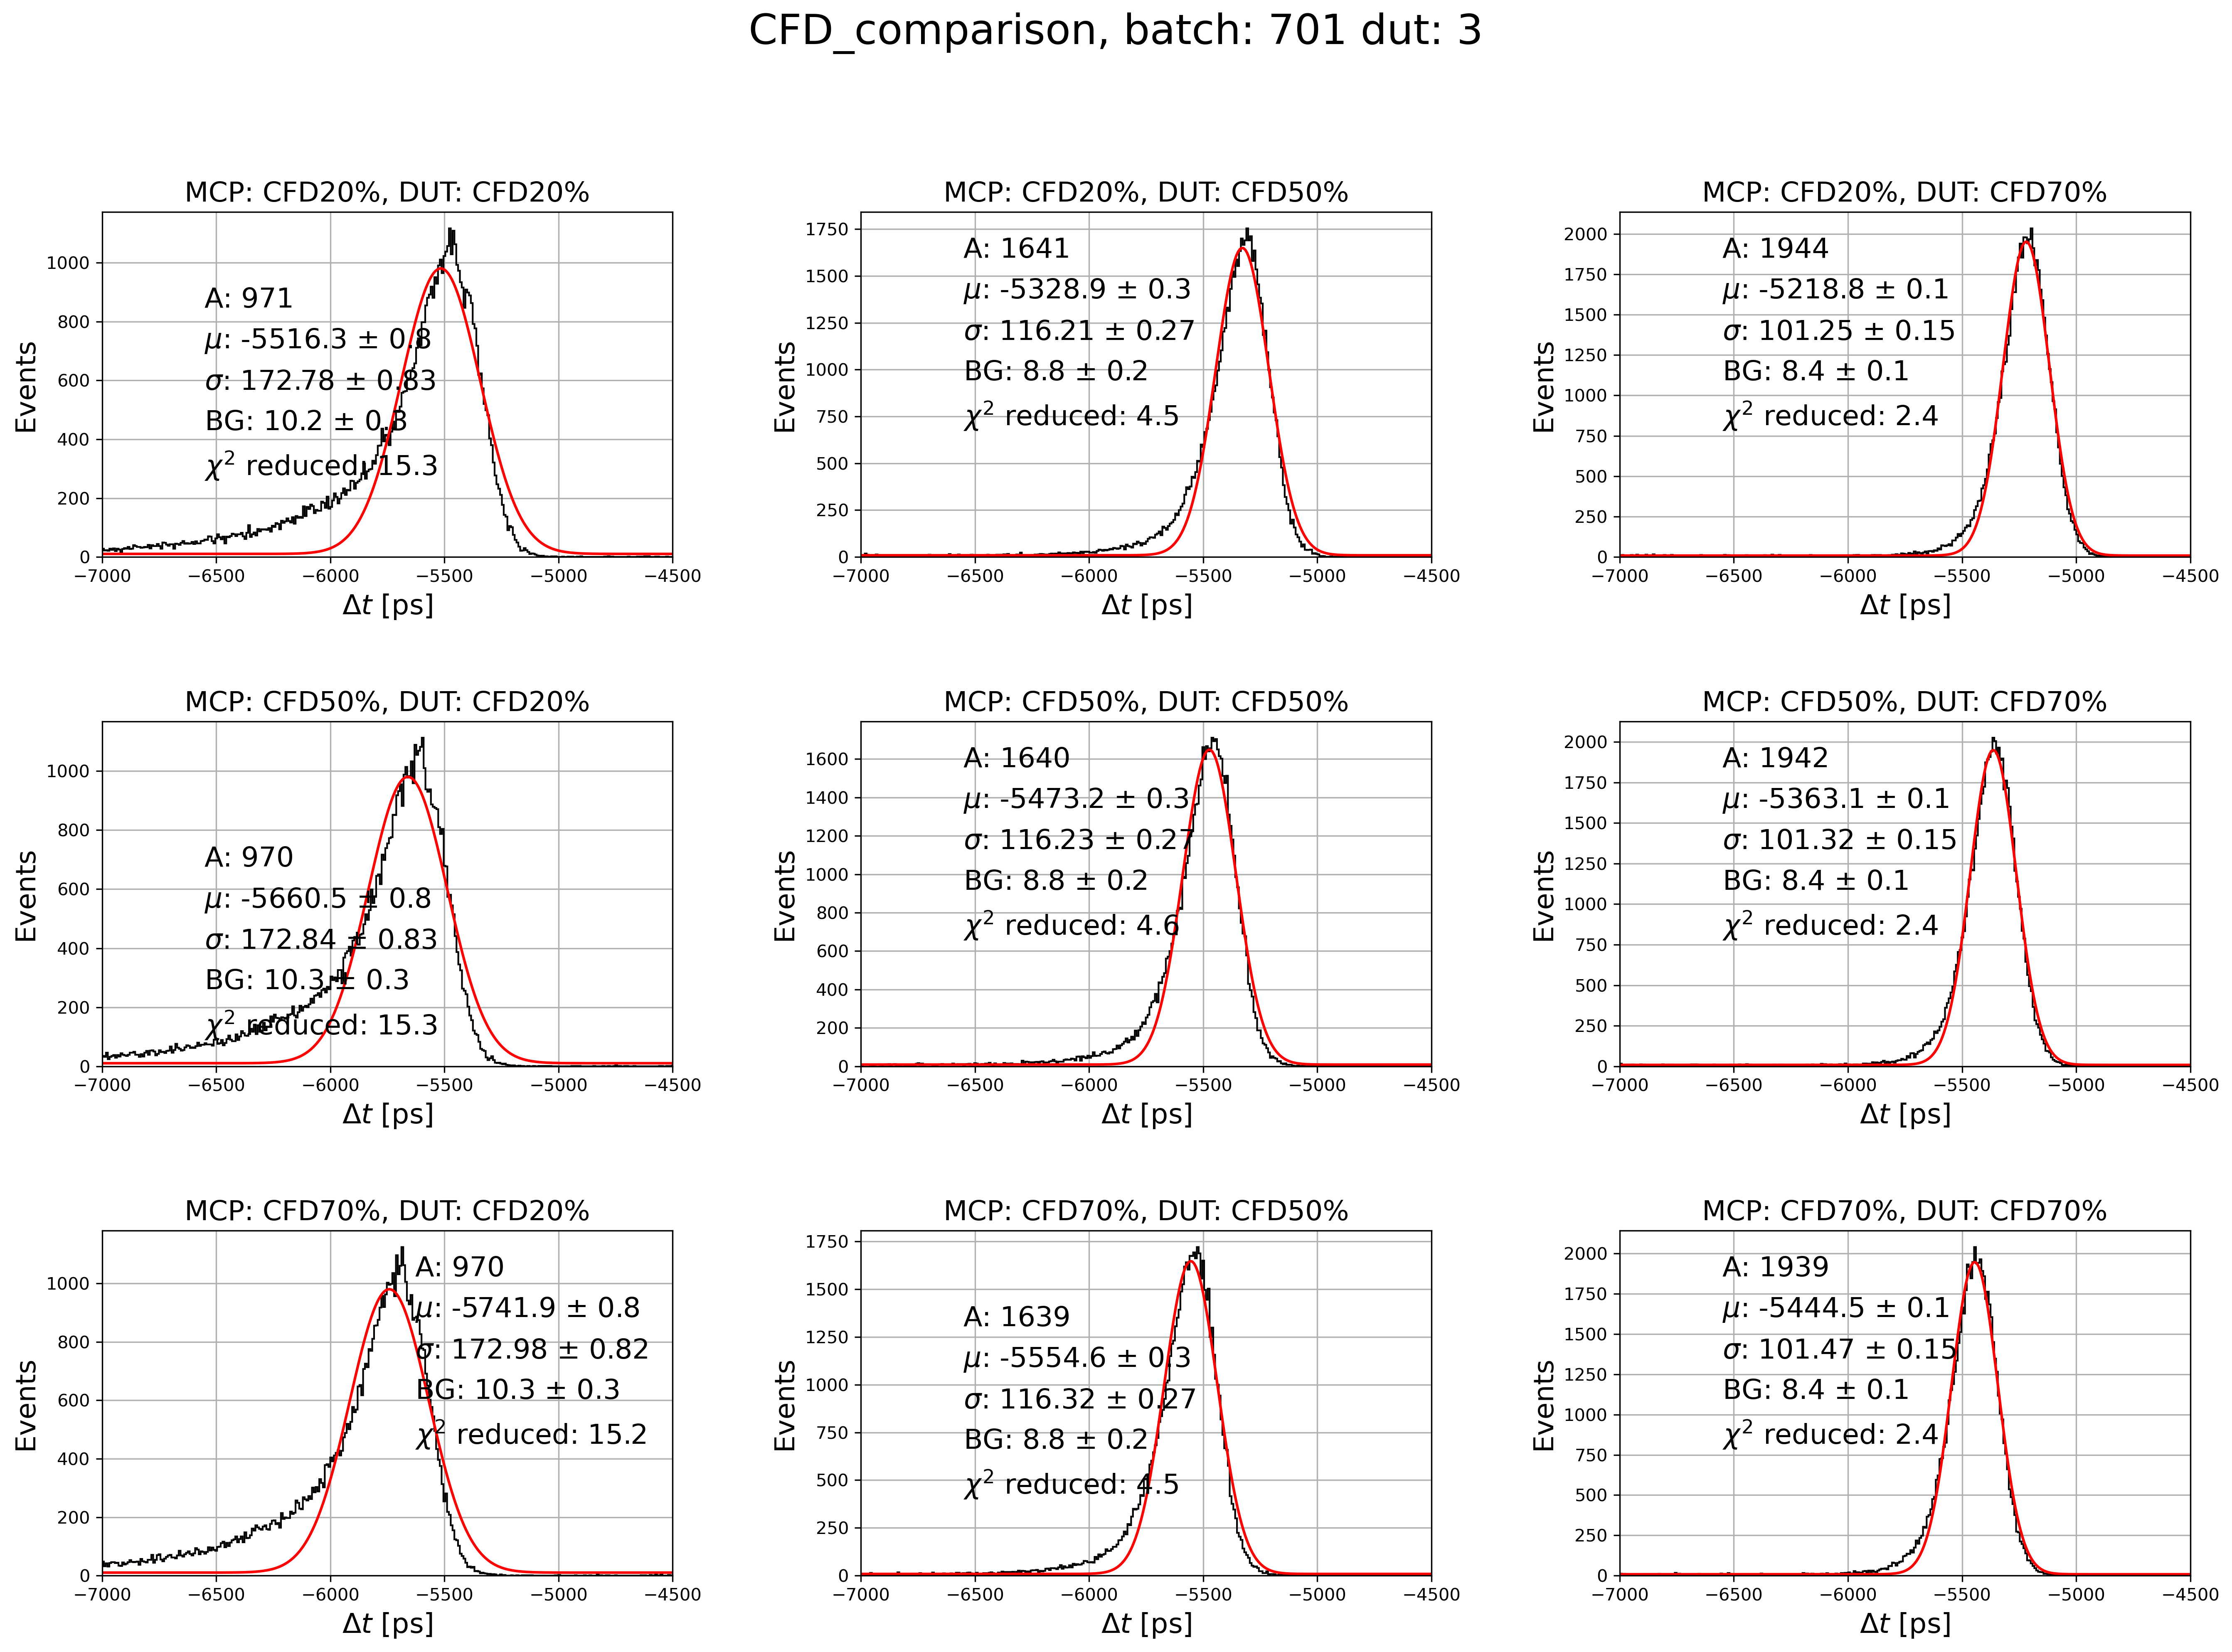

In [62]:
SAVE = False

colormap = ['k','b','g','r']

threshold_charge = 4 #fC
MCP_resolution = 36.52

CFD_values = (20, 50,70)
axes_size = len(CFD_values)
window_limit = 20e3

print("Batch: ", this_batch)

if not os.path.exists(dir_path):
    os.mkdir(dir_path)

### save in a presentation folder
# dir_path = pres_path

df = {}  # dictionary containing the two dataframes of the two oscilloscopes
use_for_geometry_cut = 'pulseheight'
binning_method = 'pulseheight' #  'time'
these_bins = bins1    ### custom bins around the sensors
time_bins = 5000
eff_lim = (0,1)
for S in ['S1','S2']: #"S2" ### the two scopes
    print(S)
    df[S] = load_batch(this_batch,S)
    print(f'MCP: {dict_of_batches[this_batch].S[S].channels["Ch1"].voltage} V, angle: {dict_of_batches[this_batch].angle}°', 'temperature:%.2f°C'%dict_of_batches[this_batch].tempA)
    ### I PUT THE TRANSIMPEDANCE TO 4700 MANUALLY

    DUTs = get_DUTs_from_dictionary(info_dict,S)
#     DUTs = (1,2)
    
    ### show full area d
    plot(df[S], "2D_Tracks", dict_of_batches[this_batch], S, bins=large_bins,
         n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} all tracks (no cut)', savefig_path=dir_path, fmt='png')  
    
    my_transimpedance = 4700

    ###[ ... if dut in DUTs else None for dut in [1,2,3]], it simply doesn't calculate the cuts for the channels with no dut
    geo_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice', use=use_for_geometry_cut)[0] if dut in DUTs else None for dut in [1,2,3]]
    central_sensor_area_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='center', use=use_for_geometry_cut)[0] if dut in DUTs else None for dut in [1,2,3]]
    time_cut = [time_mask(df[S], dut, bins=time_bins, mask=geo_cuts[dut-1], plot=False, savefig=os.path.join(dir_path,f'time_plot_with_geo_cuts_{S}_{this_batch}_DUT{dut}.png'))[0] if dut in DUTs else None for dut in [1,2,3]]
    mins = [find_min_btw_peaks(df[S][f"pulseHeight_{dut}"], bins='rice', plot=False) if dut in DUTs else None for dut in [1,2,3]]
    pulseheight_cut = [df[S][f'pulseHeight_{dut}']>mins[dut-1] if dut in DUTs else None for dut in [1,2,3]]
    charge_cut = [df[S][f'charge_{dut}']>threshold_charge if dut in DUTs else None for dut in [1,2,3]]

    # charge_params = [charge_fit(df[S], dut=dut, mask=np.logical_and(time_cut[dut-1],geo_cuts[dut-1]), transimpedance=my_transimpedance, plot=True,
    #                             savefig=os.path.join(dir_path,f'charge_fit_{S}_{this_batch}_DUT{dut}.png'))[0] if dut in DUTs else None for dut in [1,2,3]]
    # time_resolution = [time_mask(df, dut, bins=time_bins, mask=np.logical_and(np.logical_and(geo_cuts[dut-1],pulseheight_cut),charge_cut), plot=True,
    #                              savefig=os.path.join(dir_path,f'time_plot_with_geo_cuts_{S}_{this_batch}_DUT{dut}.png'))[1]['parameters'][2] if dut in DUTs else None for dut in [1,2,3]]
    #     ### show sensor by doing time cut
    plot(df[S], "2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=time_cut,
         n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} (w. time cut)', savefig_path=dir_path, fmt='png')
    # highlight the sensors
#     plot(df[S], "2D_Sensors", dict_of_batches[this_batch], S, bins=these_bins, bins_find_min=binning_method,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} (pulseHeight cut)', savefig_path=dir_path, fmt='png')
    ## delta time vs pulseHeight w/ info
#     plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} ', savefig_path=dir_path, fmt='png')
#     ### delta time vs pulseHeight no info
#     plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} no info', savefig_path=dir_path, fmt='png') 
#     ### delta time vs pulseHeight no info
#     plot(df[S], "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, mask=central_sensor_area_cuts,
#          n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} central area', savefig_path=dir_path, fmt='png')
#     ### efficiency projection whole sensor (zooomed)
#     plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, zoom_to_sensor=True, efficiency_lim=eff_lim,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC', savefig_path=dir_path)
#     ### efficiency projection in the center (zoomed)
#     plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='center', use=use_for_geometry_cut, zoom_to_sensor=True, efficiency_lim=eff_lim,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC (center)', savefig_path=dir_path)
#     ### with time cut (zoomed)
#     plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, mask=time_cut, zoom_to_sensor=True, efficiency_lim=eff_lim,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC (time cut)', savefig_path=dir_path)
#     ### with time cut in the center (zoomed)
#     plot(df[S], "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='center', use=use_for_geometry_cut, mask=time_cut, zoom_to_sensor=True, efficiency_lim=eff_lim,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} threshold charge {threshold_charge}fC (center and time cut)', savefig_path=dir_path)
#     ### 2D efficiency
#     plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, zoom_to_sensor=True,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} thresh charge {threshold_charge}fC', savefig_path=dir_path, fmt='png')
#     ### with time cut and zoomed
#     plot(df[S], "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=my_transimpedance, geometry_cut='normal', use=use_for_geometry_cut, mask=time_cut, zoom_to_sensor=True,
#         bins=these_bins, bins_find_min=binning_method, n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} thresh charge {threshold_charge}fC (w time cut)', savefig_path=dir_path, fmt='png')    
    
    CFD_mask = [np.logical_and(charge_cut[dut-1], geo_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]
    for dut in DUTs:
        plot(df[S], 'CFD_comparison', dict_of_batches[this_batch], S, n_DUT=dut, CFD_values=CFD_values, mask=CFD_mask,
             savefig=SAVE, savefig_path=dir_path)
    
    ### I NEED TO ADD THE PLOT OF THE CHARGE TOO

        
    

In [24]:
geo_cuts[2]

0          False
1          False
2          False
3          False
4           True
           ...  
1100325    False
1100326    False
1100327     True
1100328    False
1100329    False
Length: 1100330, dtype: bool

In [ ]:
### TIME RESOLUTION PLOTS (all sensors together)
SAVE = True

colormap = ['k','b','g','r']

threshold_charge = 4 #fC
MCP_resolution = 36.52

CFD_values = (20, 50,70)
axes_size = len(CFD_values)
window_limit = 20e3

for S in ['S1','S2']:
    DUTs = get_DUTs_from_dictionary(info_dict,S)
    
    fig, axes = plt.subplots(figsize=(12,8), nrows=1, ncols=1, dpi=300)
    
    geo_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice')[0] if dut in DUTs else None for dut in [1,2,3]]
#     central_sensor_area_cuts = [geometry_mask(df[S], DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='center')[0] if dut in DUTs else None for dut in [1,2,3]]
#     time_cut = [time_mask(df[S], dut, bins=time_bins, mask=geo_cuts[dut-1], plot=False, savefig=os.path.join(dir_path,f'time_plot_with_geo_cuts_{S}_{this_batch}_DUT{dut}.png'))[0] if dut in DUTs else None for dut in [1,2,3]]
    mins = [find_min_btw_peaks(df[S][f"pulseHeight_{dut}"], bins='rice', plot=False) if dut in DUTs else None for dut in [1,2,3]]
    pulseheight_cut = [df[S][f'pulseHeight_{dut}']>mins[dut-1] if dut in DUTs else None for dut in [1,2,3]]
    charge_cut = [df[S][f'charge_{dut}']>threshold_charge if dut in DUTs else None for dut in [1,2,3]]
    pulse_geo_cuts = [np.logical_and(geo_cuts[dut-1], pulseheight_cut[dut-1]) for dut in DUTs]

    for dut in DUTs:
        window_fit = np.logical_and((df[S][f"timeCFD20_{dut}"]-df[S]["timeCFD50_0"])> -window_limit,
                                   (df[S][f"timeCFD20_{dut}"]-df[S]["timeCFD50_0"])< +window_limit)
    #     dut_cut = np.logical_and(window_fit, all_cuts[dut-1])
    #     dut_cut = np.logical_and(window_fit, np.logical_and(pulseheight_cut[dut-1],geo_cuts[dut-1]))

    ### ONLY EVENTS WITH CHARGE OVER THE THRESHOLD CHARGE
        dut_cut = np.logical_and(charge_cut[dut-1],
                                 np.logical_and(window_fit, np.logical_and(pulseheight_cut[dut-1],geo_cuts[dut-1])))

        hist, my_bins,_,_,_ = plot_histogram((df[S][f"timeCFD20_{dut}"].loc[dut_cut]-df[S]["timeCFD50_0"].loc[dut_cut]),
                                             bins=time_bins, color='k', linewidth=1, alpha=1,
                                             fig_ax=(fig,axes))

        bins_centers = (my_bins[:-1]+my_bins[1:])/2
        initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
        param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
    #     print(f"Fit parameters: {param}"
        axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])

        ### add units to the parameters
        axes.plot([],[],linewidth=3, label=f"{dict_of_batches[this_batch].S[S].get_sensor(f'ch{dut+1}').name}", color=colormap[dut])
    #     axes.plot([],[],linewidth=0, label="A: %.0f" %param[0]) # only two decimals
        axes.plot([],[],linewidth=0, label="$\mu$: %.1f $\pm$ %.1f"%(param[1],covar[1,1]**0.5))
        axes.plot([],[],linewidth=0, label="$\sigma$: %.1f $\pm$ %.1f"%(param[2],covar[2,2]**0.5))
    #     axes.plot([],[],linewidth=0, label="BG: %.1f $\pm$ %.1f"%(param[3],covar[3,3]**0.5))
        ### maybe I should just make the chi² into a function
        chi2_reduced = sum((hist-my_gauss(bins_centers,*param))**2/my_gauss(bins_centers,*param))/(len(hist)-len(param))
        axes.plot([],[],linewidth=0, label="$\chi^2$ reduced: "+f"%.1f"%chi2_reduced)
    #     skewness = skew(df[S][f"timeCFD20_{dut}"].loc[dut_cut]-df[S]["timeCFD50_0"].loc[dut_cut])
    #     axes.plot([],[],linewidth=0, label=f"skewness: {skewness}")

    axes.set_xlabel(f"$\Delta t$ [ps]", fontsize=16)
    axes.set_ylabel("Events", fontsize=16)

    xlim = (-6.5e3,-4.5e3)
    # xlim = (-10e3,0)
    axes.set_xlim(xlim)
    axes.legend(fontsize=16)

    fig.suptitle(f"Time resolution fit, after applying cuts \
    \n Batch: {this_batch}, Oscilloscope: {S}",y=1, fontsize=20)

    if SAVE:
        fig.savefig(os.path.join(dir_path, f"time_resolution_{this_batch}_{S}_zoomed_and_gauss_fit_with_cuts.png"), bbox_inches="tight")

In [25]:
{100:bins3, # x
 101:bins3, # x
 199:bins3, # x
 201:bins1, # x
 202:bins1, # x
 203:bins1, # x
 204:bins1, # x    # weird time resolution
 205:bins4, # x
 206:bins4, # x
 301:bins1, # x
 401:bins1, # x
 402:bins1, # x
 403:bins1, # x
 407:bins1, # x
 408:bins1, # x
 409:bins1, # x
 410:bins1, # x
 411:bins1, # x
 413:bins1, # x
 414:bins1, # x
 501:bins2, # x    for all the 5xx batches I use time instead of pulseheight for the geometry_mask
 502:bins2, # x
 503:bins2, # x    sensors moved during the diffent runs (because the temperature changed, I have to separate in two)
 504:bins2, # x    sensor ch4 in S1 is very irradiated and seems to have negative pulseHeight BG noise
 505:bins2, # x       "    " 
 601:bins4, # x    in all 6xx, Ch2 in S2 seem to be cut out (use=time)
 602:bins4, # x    (S1: use=pulseheight,   S2: use=time)
 603:bins4, # x    (S1: use=pulseheight,   S2: use=time)
 604:bins4, # x    (S1: use=pulseheight,   S2: use=time)
 605:bins4, # x    (S1: use=pulseheight,   S2: use=time)
 701:bins1, #
 702:bins1, #
 801:bins1, #
 802:bins1, #
 901:bins1, #
 902:bins1, #
 1001:bins1, #
 1002:bins1, #
 1101:bins1, #
 1102:bins1, #

}

{100: (array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
         313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
         326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
         339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
         352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
         365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
         378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
         391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
         404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
         417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
         430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
         443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
         456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
         469, 470, 471, 472, 473,

In [ ]:
# pulseHeight_filter = df['S2']['pulseHeight_2']>mins['S2'][2]
# x_cut = df['S2']['Xtr_1'].loc[pulseHeight_filter]
# find_edges(x_cut, bins=my_bins[0], plot=True)

## Calculate all minimums (for this batch)
often useful

In [ ]:
mins = {}
for S in ["S1","S2"]:
    mins[S] = [find_min_btw_peaks(df[S][f"pulseHeight_{i}"], bins='rice', plot=False) for i in range(1,4)]
    mins[S].insert(0,None)     ### insert None as the 'peak' of the MCP

NameError: name 'df' is not defined

# PulseHeight vs $\Delta$t plot
I should try:  
https://github.com/astrofrog/mpl-scatter-density

#### PLOT ALL BATCHES (might be slow, can be done in parts)
I don't think this is a good thing to do, I should just save all the results while I do them

In [ ]:
# threshold_charge = 4

# ### SAVE THE PLOTS FOR ALL BATCHES
# binning_method = 'rice'
# RUN_ALL_BATCHES = False  ### so I don't accidentally run this
# if RUN_ALL_BATCHES:
#     for S in ["S1","S2"]: ### the two scopes
#         if S=="S2": continue
#         for this_batch in np.sort(list(dict_of_runs[S].keys())):  ### I sort them so I can restart from the batch I want
#             if this_batch>=0:# and this_batch<=500:
#                 print("Batch: ", this_batch)
#                 dir_path = f"../Data_TestBeam/2023_May/{S}/"
#                 file_path = f"tree_May2023_{S}_{this_batch}.root"    
#                 try:
#                     df = root_to_df(os.path.join(dir_path, file_path), branches)
#                 except:
#                     print("something wrong reading the file")
#                     continue
#                 df = df.drop(columns=columns_to_remove)
# #                 plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins,
#         #              savefig=True, savefig_details=f'_{S}')
# #                 plot(df,"1D_Tracks", dict_of_batches[this_batch], S, bins=large_bins,
#     #                  savefig=True, savefig_details=f'_{S}')
#         #         bins = 1000
# #                 plot(df, "pulseHeight", dict_of_batches[this_batch], S, bins=bins,
#         #             savefig=True, savefig_details=f"_{S}_bins_{bins}")
# #                 plot(df, '2D_Sensors', dict_of_batches[this_batch], S,
# #                      bins=large_bins, bins_find_min=binning_method, savefig=False, savefig_details=f'_{S}_large_bins')#_{binning_method}')
# #                 plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='normal',
# #                     bins=large_bins, bins_find_min=binning_method, savefig=True, savefig_details=f'_{S}_threshold_charge_{threshold_charge}fC_large_bins')
# #                 plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='normal',
# #                     bins=large_bins, bins_find_min=binning_method, savefig=True, savefig_details=f'_{S}_thresh_charge_{threshold_charge}fC_large_bins')
#             ### I think something is leaking memory!!!
#             plt.close('all') ### I think this worked. maybe not actually


## Plot a single run

In [ ]:
### looking at single runs 
S_run = 'S1'
dir_path = f"../Data_TestBeam/2023_May/{S_run}/"
run = 9734

if run>9999:    file_path = f"tree0{run}.root"
elif run<=9999: file_path = f"tree00{run}.root"

### branches to be loaded (+ unnecessary columns)
branches = ["eventNumber", "Xtr", "Ytr", "pulseHeight", "charge", "timeCFD20", "timeCFD50", "timeCFD70"]
columns_to_remove = ["Xtr_4","Xtr_5","Xtr_6","Xtr_7","Ytr_4","Ytr_5","Ytr_6","Ytr_7"]

try:
    df_run = root_to_df(os.path.join(dir_path, file_path), branches)
except FileNotFoundError:
    logging.error("Batch file not found")

df_run = root_to_df(os.path.join(dir_path, file_path), branches)
df_run = df_run.drop(columns=columns_to_remove)
    
plot(df_run,"2D_Sensors", dict_of_batches[412], this_scope='S1', bins=large_bins,
    savefig=False, savefig_details=f"_single_run_{run}")
# plot(df["S2"],"2D_Tracks", batch=this_batch, sensors=sensors_list[this_batch]["S2"], bins=bins)

#### Improved efficiency study

In [ ]:
this_scope = "S1"
threshold_charge = 4
plot(df[this_scope], "1D_Efficiency", dict_of_batches[this_batch], this_scope, bins=bins, geometry_cut='normal', n_DUT=[1,2,3],
                 threshold_charge=threshold_charge,
                 savefig=False, savefig_details=f'_{this_scope}_charge: {threshold_charge}fC')

# fig.savefig("../various plots/1D_Efficiency_410_S1_charge: 2fC.svg")

In [ ]:
fig, axes = plot(df[this_scope], "2D_Efficiency", dict_of_batches[this_batch], this_scope, bins=bins, geometry_cut='normal', zoom_to_sensor=True,
                 n_DUT=[1,2,3], threshold_charge=threshold_charge, savefig=False)

In [ ]:
import lecroyparser

In [ ]:
trc_file_path = "/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Data_TestBeam/2023_May/Oscilloscope_raw_1/C1WF00000.trc"

data = lecroyparser.ScopeData(trc_file_path)

data.__dict__.keys()

In [ ]:
one_point=12000
plt.plot(data.x[one_point+0:one_point+1000], data.y[one_point+0:one_point+1000])